In [1]:
import pyramses
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset, zoomed_inset_axes)
from matplotlib import rc
from matplotlib import cm

import pandas as pd
import datetime
import seaborn as sns
import json, codecs
import os
from plot_strong_weak import plot_strong_weak
from save_figure import save_figure

# from importnb import Notebook
# with Notebook(): 
#     from CIGRE18_multisim import VAR
# print(VAR)

# Set plot options
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# cm = 1/2.54
sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)
# colors_ blue, red, yellow, green. purple gray light blue dark blue dark green
palette1 = ["#1269b0","#a8322d",'#edb120','#72791c', "#91056a", '#6f6f64', '#007a96', '#1f407a','#485a2c']
# palette = ["#1269b0","#a8322d", "#91056a", '#edb120','#72791c', '#6f6f64', '#007a96', '#1f407a','#485a2c']
sns.set_palette(palette1)
# sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

In [2]:
# Current date

today = datetime.date.today()
# date = today
date = '2022-04-06'
directory = ".\\" +  str(date) + "\\"
# KP_P = np.linspace(0,2,11)
# Tp2 = [0, 1]
# Loop over the different loads
# atls = ['TL1', 'TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 
# Loop over the different files

# types = ['on', 'off', 'droop']
# types = ['active', 'inactive', 'droop']
# names = ['weak', 'strong']
# names = names_weak
# fig_name = 'strong-weak comparison'
# # names_hyst = []

# # VAR = KP_P
# # replace_str = "KP_P"
# var_path = ".\\" + str(today) + "\\var.json"
# obj_text = codecs.open(var_path, 'r', encoding='utf-8').read()
# VAR = json.loads(obj_text)
# var_str = list(VAR.keys())[0]

# out_dir = ".\\" + str(today) + "\\" + var_str + "\\"
# # Get the parameters
# with open(out_dir + 'parameters.json', 'r') as openfile:
#     parameters = json.load(openfile)
    

# fig_title = var_str + ' variation'
# fig_name = var_str + ' variation'
# for parameter in parameters:
#     fig_title += "; " + parameter + "= " + str(parameters[parameter])
#     fig_name += " " + parameter + str(parameters[parameter])
# # print(title)

# for i,var in enumerate(VAR[var_str]):
#     names.append('out_' + var_str + str(i))
#     # names_hyst.append('out_hyst' + str(i))

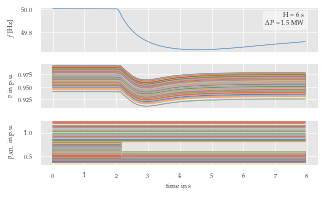

In [3]:
# import seaborn as sns
# from matplotlib import rc

# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# cm = 1/2.54
# sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
# rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
# rc('font', **{'family': 'serif', 'serif': ['Palatino']})
# rc('text', usetex=True)
# # colors_ blue, red, yellow, green. purple gray light blue dark blue dark green
# palette1 = ["#1269b0","#a8322d",'#edb120','#72791c', "#91056a", '#6f6f64', '#007a96', '#1f407a','#485a2c']
# palette = ["#1269b0","#a8322d", "#91056a", '#edb120','#72791c', '#6f6f64', '#007a96', '#1f407a','#485a2c']
# sns.set_palette(palette1)
# sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
ext = pyramses.extractor(directory + 'strong_active' + ".trj")
# plt.style.use("ggplot")
cycle = cm.tab20(range(10))

MVbuses = [i for i in range(1101,1176)]
LVbuses = [i for i in range(1,19)]
LVbuses_loads = [1,11,15,16,17,18]
LVbuses_PV = [11,15,16,17,18]
buses = []
loads = []
PVs = []
TLs = []
IMs = []
for MVbus in MVbuses:
    for LVbus in LVbuses:
        buses.append(str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        loads.append("IMP" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_PV:
        PVs.append("PV" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        TLs.append("ATL" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        IMs.append("IND" + str(MVbus) + str(LVbus).zfill(2))
pt = 1/72.27

parameters = '\n'.join(('H = 6 s',
                        '$\Delta P$ = 1.5 MW',
                        ))

fig,axs = plt.subplots(3,1, figsize = (360*pt, 210*pt), sharex='col', sharey = 'row')
fig.subplots_adjust(hspace=0.25, wspace = 0.05)
axs = axs.ravel()
w = ext.getSync('G').S

sns.lineplot(ax=axs[0], y=w.value*50, x=w.time,linewidth=0.5, label='f', legend = False)
# axs[0].plot(w.time, w.value*50, label='f')
# axs[0].set_title('Frequency')
axs[0].set_ylabel('$f$ [Hz]')
for i, bus in enumerate(buses):
    v = ext.getBus(bus).mag
    axs[1].plot(v.time, v.value, linewidth=0.4, color = cycle[i%len(cycle)])
#     ax1.legend(loc="upper right")
# axs[1].set_title('Voltage Magnitude')
axs[1].set_ylabel('$v$ in p.u.')
# axs[2].set_title('Active Power')
axs[2].set_ylabel('$p_\mathrm{ATL}$ in p.u.')
# axs[3].set_title('Rective Power')
# axs[3].set_ylabel('$q_\mathrm{atl}$ [p.u.]')
axs[2].set_xlabel('time in s')    
for j, unit in enumerate(TLs): 
    P = ext.getInj(unit).P
    # Q = ext.getInj(unit).Q
    # wm = ext.getInj(unit).wm
    punit = ext.getInj(unit).Punit
    qunit = ext.getInj(unit).Qunit

    status = ext.getInj(unit).status
    axs[2].plot(punit.time, punit.value, linewidth=0.4, color = cycle[j%len(cycle)])
    # axs[3].plot(qunit.time, qunit.value, linewidth=0.4)
    # axs[3].plot(P.time, P.value*1000, linewidth=0.4)
#     ax2.legend(loc="upper right")
    # axs[3].set_title('Reactive Power in kVar')
    # axs[3].plot(qunit.time, qunit.value, label=unit)


# axs[3].set_ylabel('$P_\mathrm{atl}$ [kW]')

props = dict(boxstyle='square', facecolor='white', alpha=0.5)
axs[0].text(0.95, 0.87,parameters, bbox=props, transform=axs[0].transAxes, ha = 'right', va = 'top')
fig.align_ylabels(axs[:])    
fig.savefig(directory + 'strong_active.png',bbox_inches='tight', dpi = 300)
    
# plt.savefig(out_dir+'Vn.pdf')  

In [4]:
# ext = {}
# names=['strong_grid']
names=['']

# types = ['PVall', 'PVnb', 'PVsupp', 'PVnbv', 'PVnbvonly','suppNbv']
# types = ['supp','suppNbv', 'suppNbv2']
types = ['withIF', 'withoutIF', 'IF', 'noIF']
variables = ['time [s]', '$f$ [Hz]', '$v$ [p.u.]', '$Pgen$ [pu]']
fig_name = 'strong-weak comparison'
events_left = {
    'Power drop': 2,
    '$LoE = 1$':2.5,
    '2 units shut down (centralized control)': 3.65,
    '2 units shut down (droop control)': 5.1
}
events_right = {
    'Power drop': 2,
    '$LoE = 1$':2.5,
}

parameters_left = '\n'.join(('$H = 1.5$ s',
                             '$\Delta P = -1.5$ MW',
                             # "ATLs' load share = 20\%"
                            ))
parameters_right = '\n'.join(('$H = 6$ s',
                              '$\Delta P = -1.5$ MW',
                              # "ATLs' load share = 20\%"
                             ))

In [5]:
A = []
B = []
C = variables*len(types)*len(names)
D = []
for name in names:
    for var in variables:
        for typ in types:
            A += [name]
for name in names:
    for typ in types:
        for var in variables:
            B += [typ]

for name in names:
    for typ in types:
        # ext1 = pyramses.extractor(directory + name + '_' + typ + ".trj")
        ext = pyramses.extractor(directory + name + '_' + typ + ".trj")
        D.append(ext.getSync('G').S.time)
        D.append(ext.getSync('G').S.value*50)
        D.append(ext.getBus('114115').mag.value)
        D.append(ext.getInj('PV114115').Qgen.value)
df = pd.DataFrame(zip(A, B, C, D), columns=['name','type', 'value','data'])
df.set_index(['name', 'type', 'value'], inplace=True)
df

FileNotFoundError: [Errno 2] No such file or directory: '.\\2022-04-06\\_withIF.trj'

NameError: name 'df' is not defined

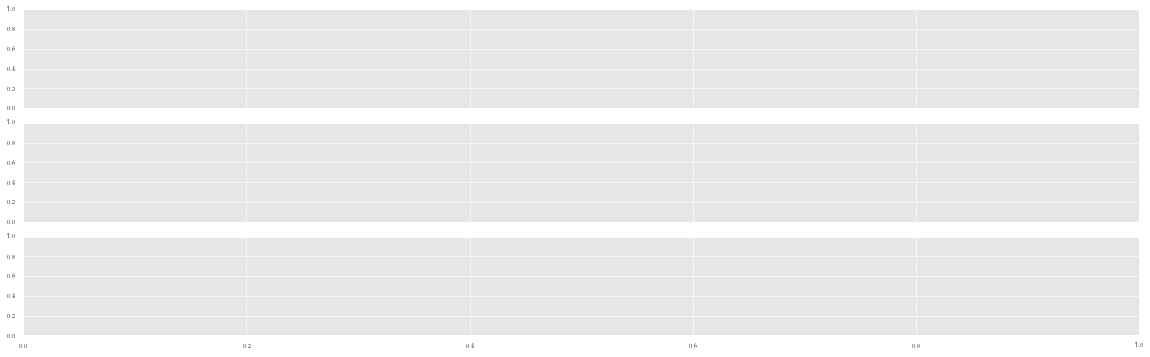

In [6]:
fig,axs = plt.subplots(3,1, figsize = (20,6), sharex='col', sharey = 'row')
# fig.suptitle("\detokenize{"+ fig_title +"}")
fig.subplots_adjust(hspace=0.15, wspace = 0.05)
axs = axs.ravel()
for typ in types:
    sns.lineplot(ax=axs[0], y=C[1], x=C[0], data=df['data'][''][typ],linewidth=0.5, label=typ, legend = False)
    sns.lineplot(ax=axs[1], y=C[2], x=C[0], data=df['data'][''][typ],linewidth=0.5, label=typ, legend = False)
    sns.lineplot(ax=axs[2], y=C[3], x=C[0], data=df['data'][''][typ],linewidth=0.5, label=typ, legend = False)

    # sns.lineplot(ax=axs[2], y=C[2], x=C[0], data=df['data']['weak'][typ],linewidth=0.5, label=typ, legend = False)
    # sns.lineplot(ax=axs[3], y=C[2], x=C[0], data=df['data']['strong'][typ],linewidth=0.5, label=typ, legend = False)

# for event, time in events_left.items():  
#     for ax in axs[0],axs[2]:
#         ax.axvline(x = time, color = 'grey', linewidth=0.5)
#     axs[0].text(time+0.05, 50, event) # to correct the height for the data present.
# for event, time in events_right.items():  
#     for ax in axs[1],axs[3]:
#         ax.axvline(x = time, color = 'grey', linewidth=0.5)
#     axs[1].text(time+0.05, 50, event) # to correct the height for the data present.
# axs[2].set_xlim([1.75,7.25])    
axs[2].set_xlim([1.75,7.25])    
fig.align_ylabels(axs[:])
axs[1].legend(loc = 'upper right', bbox_to_anchor=(1, 1.1), ncol=len(types))
# axs[0].set_title('Weak grid')
# axs[2].set_title('Strong grid')

# props = dict(boxstyle='square', facecolor='white', alpha=0.5)
# axs[0].text(0.98, 0.95,parameters_left, bbox=props, transform=axs[0].transAxes, ha = 'right', va = 'top')
# axs[1].text(0.98, 0.95,parameters_right, bbox=props, transform=axs[1].transAxes, ha = 'right', va = 'top')

str_i = "" 
i = 0
while True:
    if not os.path.exists(directory + fig_name + str_i + '.png'):
        fig.savefig(directory + fig_name + str_i + '.png',bbox_inches='tight', dpi = 300)

        break
    else:
        i += 1
        str_i = " " + str(i) 

In [7]:
# %run plot_strong_weak.py
# plot_strong_weak(types, directory, 2, fig_name)

In [8]:
fig_name = 'sum of PV loads comparison'
MVbuses = [i for i in range(1101,1176)]
LVbuses = [i for i in range(1,19)]
LVbuses_loads = [1,11,15,16,17,18]
LVbuses_PV = [11,15,16,17,18]
buses = []
loads = []
PVs = []
TLs = []
IMs = []
for MVbus in MVbuses:
    for LVbus in LVbuses:
        buses.append(str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        loads.append("IMP" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_PV:
        PVs.append("PV" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        TLs.append("ATL" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        IMs.append("IND" + str(MVbus) + str(LVbus).zfill(2))
P_if = 0
P_noif = 0
P_suppNbv2 = 0
events = {
    'Power drop': 2,
    'LoE = 1':2.5
}
ext=pyramses.extractor(directory + "_withIF.trj")
for PV in PVs:
    P_if += ext.getInj(PV).Pgen.value
    
ext=pyramses.extractor(directory + "_withoutIF.trj")
for PV in PVs:
    P_noif += ext.getInj(PV).Pgen.value
    
# ext=pyramses.extractor(directory + "strong_grid_suppNbv2.trj")
# for PV in PVs:
#     P_suppNbv2 += ext.getInj(PV).Qgen.value
fig = plt.figure(None, (10,6))
ax1 = fig.subplots(1,1)
ext=pyramses.extractor(directory + "_withIF.trj")
ax1.plot(ext.getInj('PV111011').Pgen.time, P_if, label = 'withIF')
ext=pyramses.extractor(directory + "_withoutIF.trj")
ax1.plot(ext.getInj('PV111011').Pgen.time, P_noif,  label = 'withoutIF')
# ext=pyramses.extractor(directory + "strong_grid_suppNbv2.trj")
# ax1.plot(ext.getInj('PV111011').Pgen.time, P_suppNbv2,  label = 'suppNbv2')
# for event in events:
#     ax1.axvline(x = events[event], color = 'grey')
#     ax1.text(events[event]+0.05, 6.73, event)
    
ax1.set_xlim([1.75,7.25])
ax1.set_xlabel('time [s]')
ax1.set_ylabel('PV power [MW]')
ax1.legend()
save_figure(directory, fig_name, fig)

FileNotFoundError: [Errno 2] No such file or directory: '.\\2022-04-06\\_withIF.trj'

In [9]:
fig_name = 'sum of ATL loads comparison'
MVbuses = [i for i in range(1101,1176)]
LVbuses = [i for i in range(1,19)]
LVbuses_loads = [1,11,15,16,17,18]
LVbuses_PV = [11,15,16,17,18]
buses = []
loads = []
PVs = []
TLs = []
IMs = []
for MVbus in MVbuses:
    for LVbus in LVbuses:
        buses.append(str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        loads.append("IMP" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_PV:
        PVs.append("PV" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        TLs.append("ATL" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        IMs.append("IND" + str(MVbus) + str(LVbus).zfill(2))
P_supp = 0
P_suppNbv = 0
P_suppNbv2 = 0
events = {
    'Power drop': 2,
    'LoE = 1':2.5
}
ext=pyramses.extractor(directory + "strong_grid_supp.trj")

for ATL in TLs:
    P_supp += ext.getInj(ATL).Q.value
ext=pyramses.extractor(directory + "strong_grid_suppNbv.trj")
for ATL in TLs:
    P_suppNbv += ext.getInj(ATL).Q.value
ext=pyramses.extractor(directory + "strong_grid_suppNbv2.trj")
for ATL in TLs:
    P_suppNbv2 += ext.getInj(ATL).Q.value
fig = plt.figure(None, (10,6))
ax1 = fig.subplots(1,1)
ext=pyramses.extractor(directory + "strong_grid_supp.trj")
ax1.plot(ext.getInj('PV111011').Pgen.time, P_supp, label = 'supp')
ext=pyramses.extractor(directory + "strong_grid_suppNbv.trj")
ax1.plot(ext.getInj('PV111011').Pgen.time, P_suppNbv,  label = 'suppNbv')
ext=pyramses.extractor(directory + "strong_grid_suppNbv2.trj")
ax1.plot(ext.getInj('PV111011').Pgen.time, P_suppNbv2,  label = 'suppNbv2')
# for event in events:
#     ax1.axvline(x = events[event], color = 'grey')
#     ax1.text(events[event]+0.05, 6.73, event)
    
ax1.set_xlim([1.75,7.25])
ax1.set_xlabel('time [s]')
ax1.set_ylabel('ATL power [MW]')
ax1.legend()
save_figure(directory, fig_name, fig)

FileNotFoundError: [Errno 2] No such file or directory: '.\\2022-04-06\\strong_grid_supp.trj'

In [10]:
fig_name = 'sum of exponential loads comparison'
MVbuses = [i for i in range(1101,1176)]
LVbuses = [i for i in range(1,19)]
LVbuses_loads = [1,11,15,16,17,18]
LVbuses_PV = [11,15,16,17,18]
buses = []
loads = []
PVs = []
TLs = []
IMs = []
for MVbus in MVbuses:
    for LVbus in LVbuses:
        buses.append(str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        loads.append("IMP" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_PV:
        PVs.append("PV" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        TLs.append("ATL" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        IMs.append("IND" + str(MVbus) + str(LVbus).zfill(2))
P_active = 0
P_unactive = 0
P_droop = 0
events = {
    'Power drop': 2,
    'LoE = 1':2.5
}
ext=pyramses.extractor(directory + "strong_grid_supp.trj")

for IMP in loads:
    P_active += ext.getInj(IMP).P.value
ext=pyramses.extractor(directory + "strong_grid_suppNbv.trj")
for IMP in loads:
    P_unactive += ext.getInj(IMP).P.value
ext=pyramses.extractor(directory + "strong_grid_suppNbv2.trj")
for IMP in loads:
    P_droop += ext.getInj(IMP).P.value
fig = plt.figure(None, (10,6))
ax1 = fig.subplots(1,1)
ext=pyramses.extractor(directory + "strong_grid_supp.trj")
ax1.plot(ext.getInj('IMP111001').P.time, P_active, label = 'active')
ext=pyramses.extractor(directory + "strong_grid_suppNbv.trj")
ax1.plot(ext.getInj('IMP117501').P.time, P_unactive,  label = 'unactive')
ext=pyramses.extractor(directory + "strong_grid_suppNbv2.trj")
ax1.plot(ext.getInj('IMP117501').P.time, P_droop,  label = 'droop')
# for event in events:
#     ax1.axvline(x = events[event], color = 'grey')
#     ax1.text(events[event]+0.05, 6.73, event)
    
ax1.set_xlim([1.75,7.25])
ax1.set_xlabel('time [s]')
ax1.set_ylabel('Exponent loads power [MW]')
ax1.legend()
save_figure(directory, fig_name, fig)

FileNotFoundError: [Errno 2] No such file or directory: '.\\2022-04-06\\strong_grid_supp.trj'

In [11]:
Fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(9*cm,12.5*cm), sharex=True) 
Fig.suptitle('ATL110111')
# Loop over some different simulation results stored in different trj files

for name in names:
    ext = pyramses.extractor(directory+name+".trj")
    data = pd.DataFrame(data = ext.getSync('G').S.time, columns=["time"])
#     data["pt"] = ext.getBranch('TxMAIN').PF.value*1000
    data["wm"] = ext.getInj('ATL110111').wm.value
    data["v"] = ext.getBus('117501').mag.value
    # data["F_help_high"] = ext.getInj('TL117511').F_hlp_high.value
    data["P"] = ext.getInj('ATL110111').P.value*1000
    data["f"] = ext.getSync('G').S.value*50
    # data["f"] = ext.getInj('TL11').f.value

    if name == names[1]:
        ax1 = sns.lineplot(ax=ax1, y="wm", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}", linestyle="--")
        ax2 = sns.lineplot(ax=ax2, y="v", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}", linestyle="--")
        ax3 = sns.lineplot(ax=ax3, y="P", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}", linestyle="--")
        ax4 = sns.lineplot(ax=ax4, y="f", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}", linestyle="--")

#     ax1 = sns.lineplot(ax=ax1, y="pt", x="time", data=data,linewidth=0.5)
    else:
        ax1 = sns.lineplot(ax=ax1, y="wm", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}")
        ax2 = sns.lineplot(ax=ax2, y="v", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}")
        ax3 = sns.lineplot(ax=ax3, y="P", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}")
        ax4 = sns.lineplot(ax=ax4, y="f", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}")


    # Legend

# Plot results for ATL Share
# Axis labels
ax1.set_ylabel(r'$\omega_m$ in p.u.')
ax2.set_ylabel(r'V')
ax3.set_ylabel(r'P in kW')
ax4.set_ylabel(r'$f$ in Hz')
ax4.set_xlabel(r"time in s")

ax1.legend(loc = 'right')
ax2.legend(loc = 'right')
ax3.legend(loc = 'right')
ax4.legend(loc = 'right')

# Axis limits
# ax1.set_xlim([1.25,10.25])
# ax2.set_xlim([1.25,10.25])
# ax3.set_xlim([1.25,10.25])
ax4.set_xlim([1.25,10.25])
plt.savefig('.\\' + str(today) + '\\' + 'values comparison.pdf')



TypeError: unsupported operand type(s) for *: 'int' and 'module'

In [12]:

for i, atl in enumerate(atls):
    i, (ax2,ax3,ax4) = plt.subplots(3,1, figsize =(9*cm,12.5*cm), sharex=True) 
    i.suptitle(atl)
    # Loop over some different simulation results stored in different trj files
    for name in names:
        ext = pyramses.extractor(directory+name+".trj")
        data = pd.DataFrame(data = ext.getSync('G').S.time, columns=["time"])
    #     data["pt"] = ext.getBranch('TxMAIN').PF.value*1000
        data["wm"] = ext.getInj(atl).wm.value
        data["patl"] = ext.getInj(atl).P.value*1000
        data["f"] = ext.getInj(atl).f.value
    #     ax1 = sns.lineplot(ax=ax1, y="pt", x="time", data=data,linewidth=0.5)
        ax2 = sns.lineplot(ax=ax2, y="wm", x="time", data=data,linewidth=0.5, label=name)
        ax3 = sns.lineplot(ax=ax3, y="patl", x="time", data=data,linewidth=0.5, label=name)
        ax4 = sns.lineplot(ax=ax4, y="f", x="time", data=data,linewidth=0.5, label=name)

       
        # Legend
    ax2.legend()
    # Plot results for ATL Share
    # Axis labels
    # ax1.set_ylabel(r'$P_t$ in kW')
    ax2.set_ylabel(r'$\omega_m$ in p.u.')
    ax3.set_ylabel(r'$P_{atl}$ in kW')
    ax4.set_ylabel(r'$f$ in Hz')
    ax4.set_xlabel(r"time in s")


    # Axis limits
    # ax1.set_xlim([-0.25,5.25])
    ax2.set_xlim([-0.25,4.25])
    ax3.set_xlim([-0.25,4.25])
    ax4.set_xlim([-0.25,4.25])

    plt.savefig('.\\' + str(today) + '\\' + atl + '.pdf')
   
    
 

NameError: name 'atls' is not defined